In [1]:
#is there a seasonality to frequency of streaming the Top 200 songs 
#has streaming frequency been impacted by Covid?

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from datetime import datetime
from datetime import date

#data files
us_data = pd.read_csv("../combined_csv/US_combined.csv")
world_data = pd.read_csv("../combined_csv/Global_combined.csv")
us_data = pd.DataFrame(us_data)
us_data.head()

,Position,Track Name,Artist,Streams,URL,Date,Unique ID
0,001,The Box,Roddy Ricch,12533419,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,01.02.20,01.02.20_001
1,002,ROXANNE,Arizona Zervas,9844160,https://open.spotify.com/track/696DnlkuDOXcMAn...,01.02.20,01.02.20_002
2,003,Circles,Post Malone,7932216,https://open.spotify.com/track/21jGcNKet2qwijl...,01.02.20,01.02.20_003
3,004,BOP,DaBaby,7560429,https://open.spotify.com/track/6Ozh9Ok6h4Oi1wU...,01.02.20,01.02.20_004
4,005,Falling,Trevor Daniel,7197448,https://open.spotify.com/track/4TnjEaWOeW0eKTK...,01.02.20,01.02.20_005


In [3]:
# Retrieve the 'Date' and 'Streams' columns
stream_data = us_data.loc[:,['Date', 'Streams']]

# Convert the 'Streams'column into numeric datatype
stream_data['Streams'] = pd.to_numeric(stream_data['Streams'], errors='coerce')

# Convert 'Date' column into datetime datatype
stream_data['Date'] = pd.to_datetime(stream_data['Date'], errors='coerce').dt.date 
print(stream_data.dtypes)

# drop missing values
stream_data= stream_data.dropna()

# sort the dataframe by data in ascending order
stream_update=stream_data.sort_values(by='Date')

# set 'Date' as index
stream_update.set_index('Date', inplace=True)


Date        object
Streams    float64
dtype: object


In [4]:
# group original dataframe by Date and show the total number of streams by dates from 2019 to 2020
freq_by_date = stream_data.groupby('Date').sum()
freq_by_date.head()

,Streams
Date,
2019-10-31,611748921.0
2019-11-07,541337139.0
2019-11-14,518592206.0
2019-11-21,527661357.0
2019-11-28,546030278.0


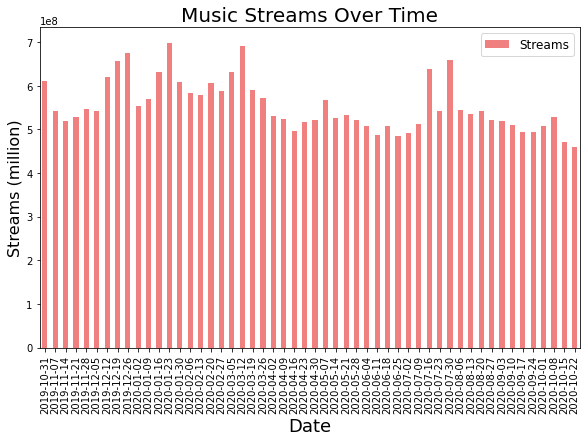

In [5]:
# create a bar plot for this dataframe by date over a year
freq_by_date.plot(kind='bar', figsize=(8,6), color ='lightcoral')
plt.tight_layout()
plt.title('Music Streams Over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Streams (million)', fontsize =16)
plt.legend(fontsize =12)
plt.savefig("Music Streams Frequency by Date.png")
plt.show()


In [6]:
# Create bins in which to place values based upon Date
bins = [np.datetime64(date(2019,10,1)), 
        np.datetime64(date(2019,12,31)),
        np.datetime64(date(2020,3,31)),
        np.datetime64(date(2020,6,30)),
        np.datetime64(date(2020,9,30)),
        np.datetime64(date(2020,12,31))]

# Create labels 'seasons' for these bins
group_name = ['19-Q4', '20-Q1', '20-Q2', '20-Q3', '20-Q4']

# Slice the data and place it into bins
stream_update['Season'] = pd.cut(stream_update.index, bins, labels = group_name)

# groupby the dataframe by Season and show the total number of streams by each season from 2019 to 2020
season_df = stream_update.groupby('Season').sum()
season_df

,Streams
Season,
19-Q4,5.242279e+09
20-Q1,7.904265e+09
20-Q2,6.725403e+09
20-Q3,7.005706e+09
20-Q4,1.969361e+09


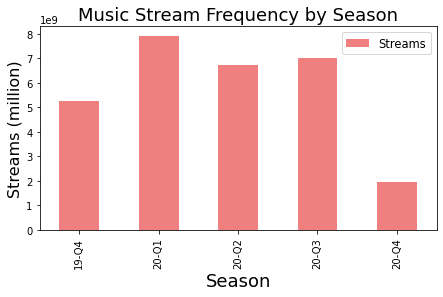

In [7]:
# create a bar plot for the season dataframe 
season_df.plot(kind='bar', color ='lightcoral')
plt.tight_layout()
plt.title('Music Stream Frequency by Season',fontsize=18)
plt.xlabel('Season', fontsize = 18)
plt.ylabel('Streams (million)', fontsize = 16)
plt.legend(fontsize =11.5)
plt.savefig("Music Streams Frequency by Season.png")
plt.show()
